In [1]:
import os, json, random, cv2
import numpy as np
from collections import defaultdict
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt

In [2]:
def check_samples(OUT_DIR):

    imgs = []
    labels = []

    for cls in sorted(os.listdir(OUT_DIR)):

        files = glob.glob(os.path.join(OUT_DIR, cls, "*.jpg"))

        if not files:
            continue

        img = cv2.cvtColor(cv2.imread(files[0]), cv2.COLOR_BGR2RGB)

        imgs.append(img)
        labels.append(cls)


    n = len(imgs)
    cols = min(5, n)
    rows = (n + cols - 1) // cols

    plt.figure(figsize=(3 * cols, 3 * rows))

    for i, (img, lbl) in enumerate(zip(imgs, labels)):
        ax = plt.subplot(rows, cols, i + 1)
        ax.imshow(img)
        ax.set_title(lbl, fontsize=9)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

In [3]:
COCO_JSON = "/home/gridsan/manderson/ovdsat/data/mar/mar_coco_all.json"
IMAGE_DIR = "/home/gridsan/manderson/ovdsat/data/mar/JPEGImages"

## Dark/Bright

#### Bright

100%|██████████| 20/20 [00:17<00:00,  1.14it/s]


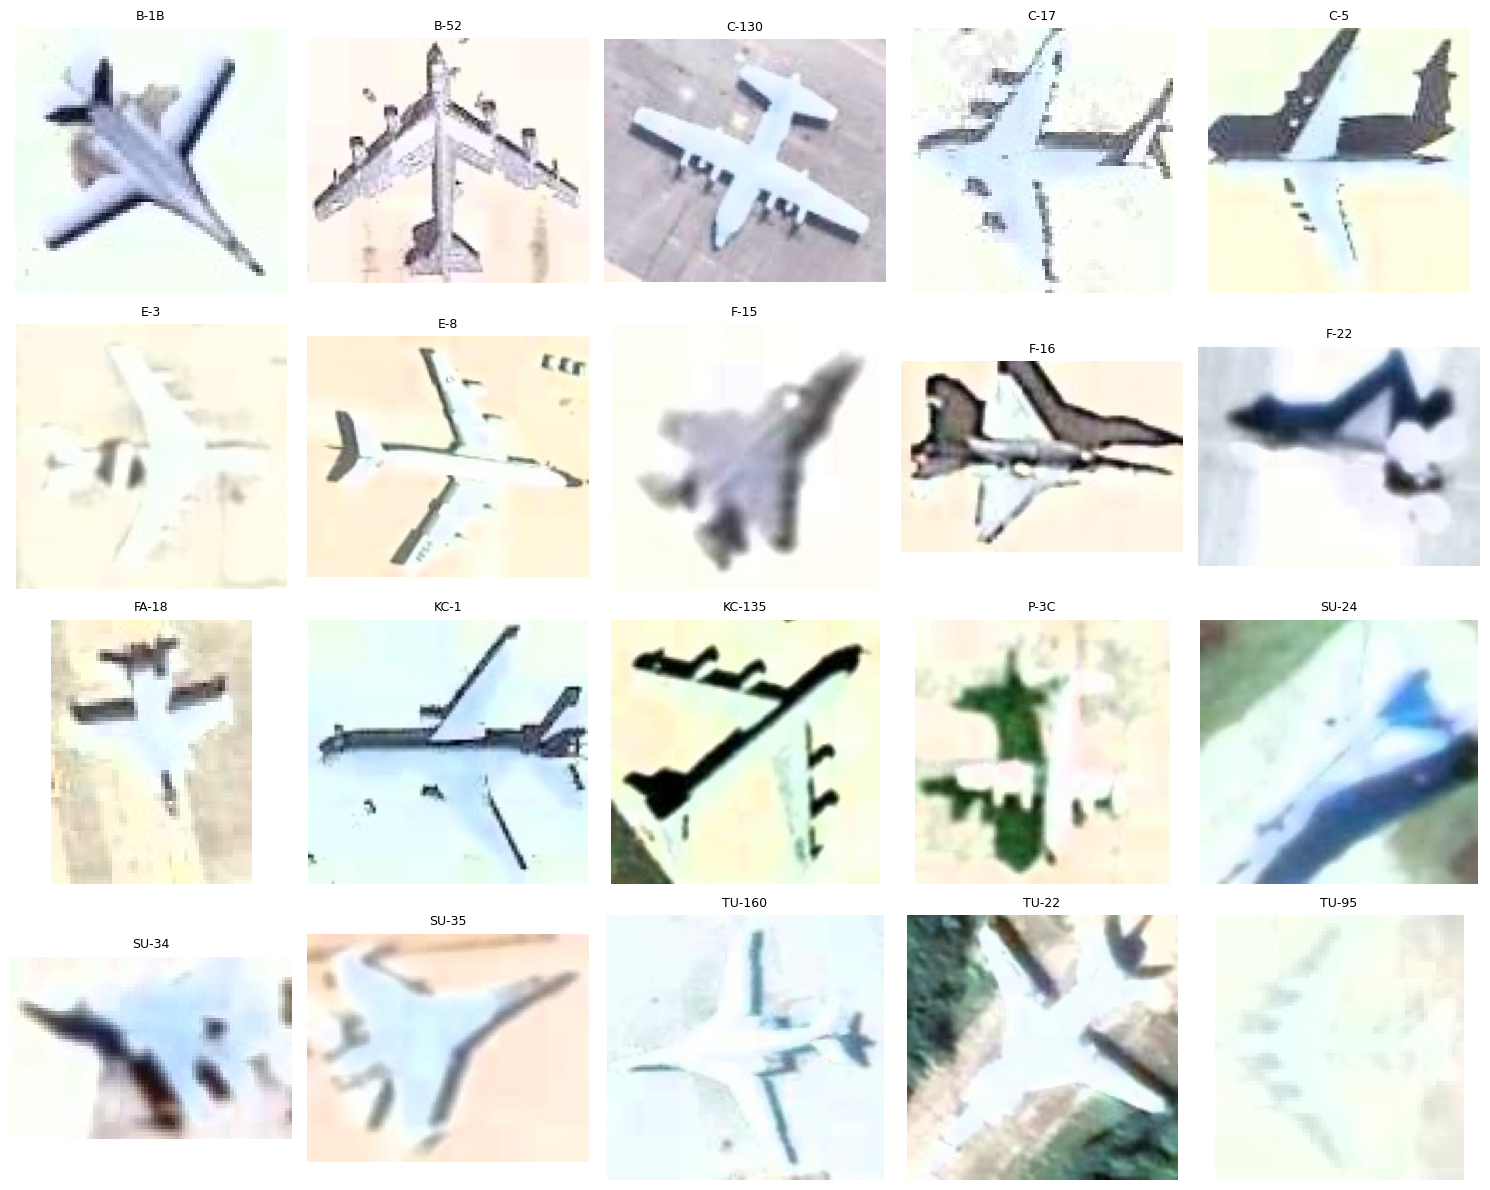

100%|██████████| 20/20 [00:15<00:00,  1.30it/s]


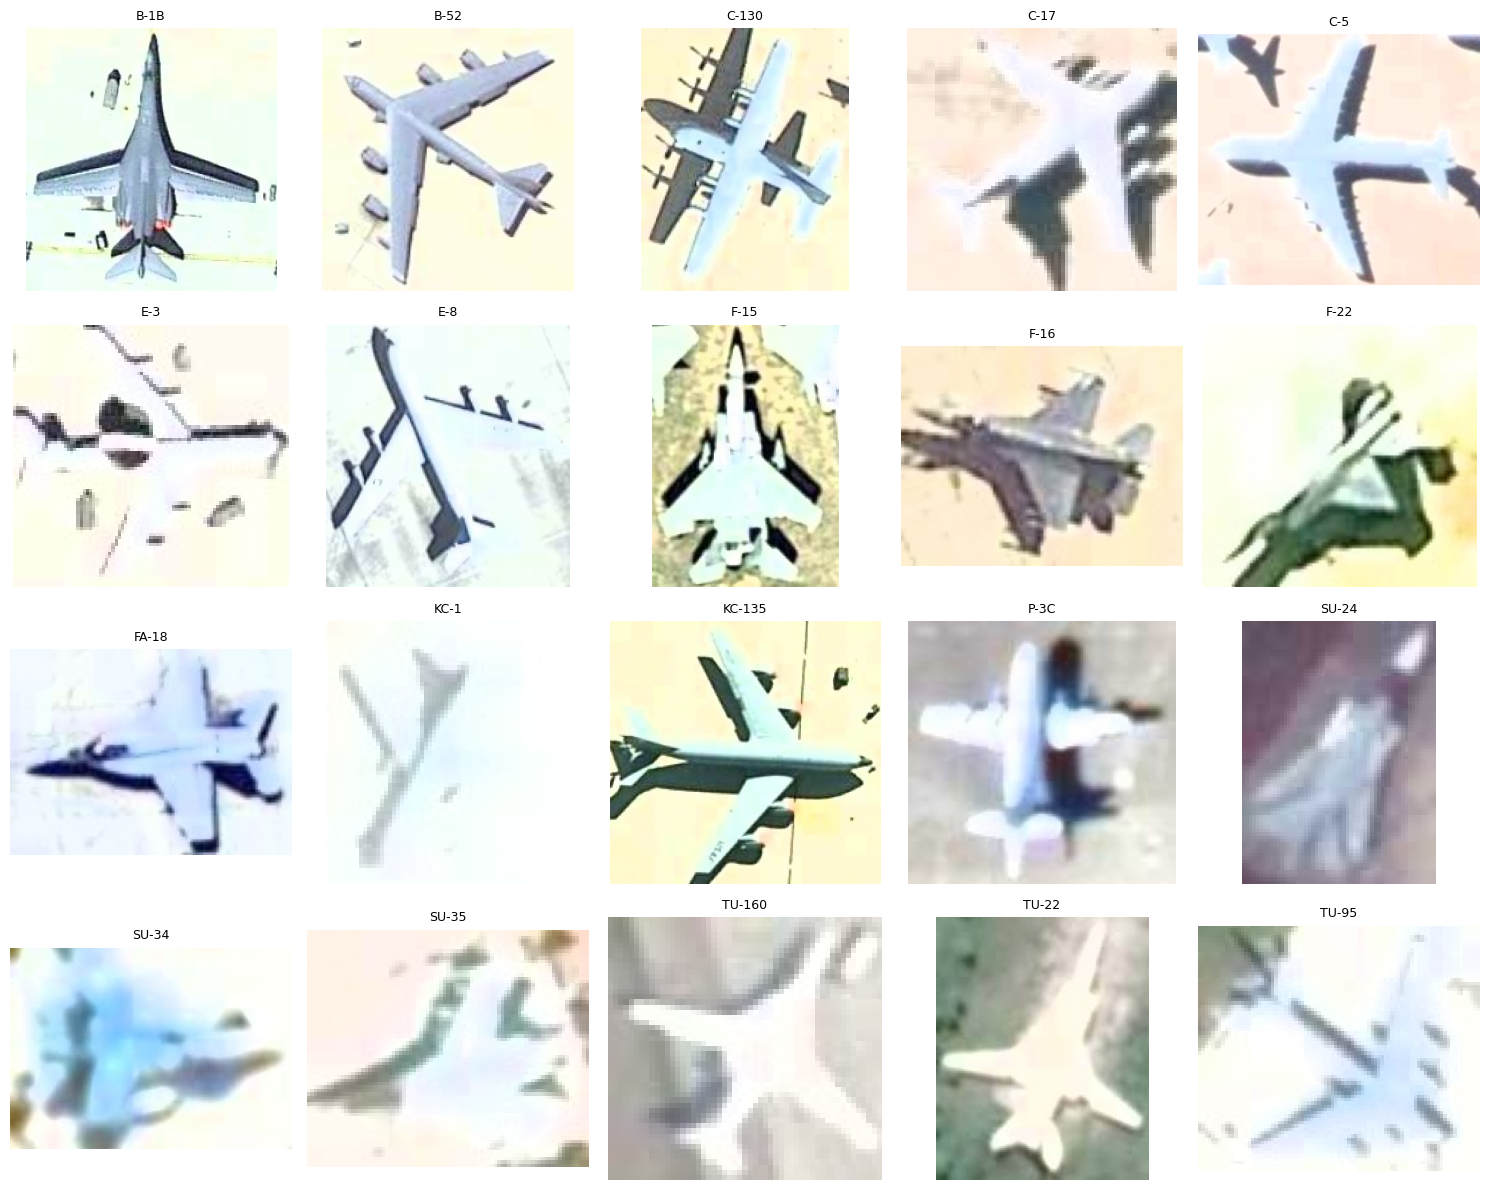

100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


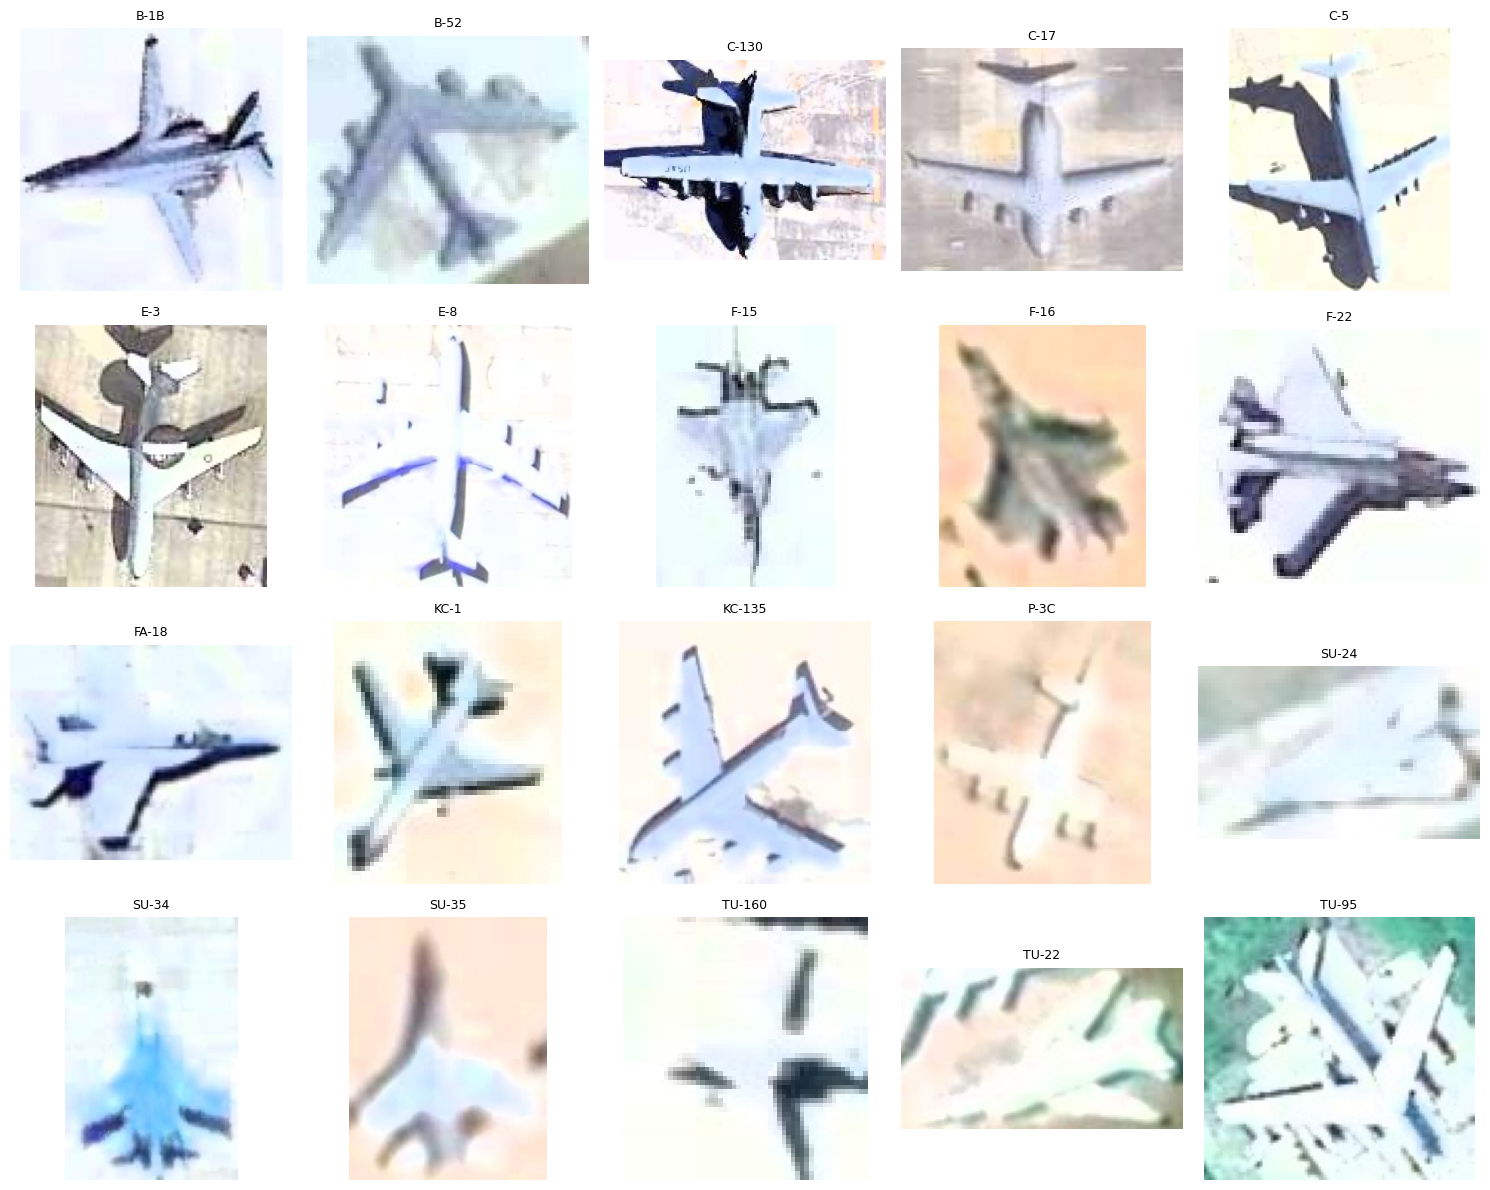

In [5]:
# MAX_GAIN = 2.2
# MIN_GAIN = 1.2

# N = 1

# for M in [1, 2, 3]:
#     IN_DIR = f"/home/gridsan/manderson/ovdsat/data/cropped_data/mar/train/mar_N{N}-{M}"
#     OUT_DIR = f"/home/gridsan/manderson/ovdsat/data/cropped_data/mar/train/mar_N{N}-{M}-bright"

#     os.makedirs(OUT_DIR, exist_ok=True)

#     for cls in tqdm(os.listdir(IN_DIR)):

#         in_cls = os.path.join(IN_DIR, cls)
#         out_cls = os.path.join(OUT_DIR, cls)

#         if not os.path.isdir(in_cls):
#             continue

#         os.makedirs(out_cls, exist_ok=True)

#         for name in os.listdir(in_cls):

#             in_path = os.path.join(in_cls, name)
#             out_path = os.path.join(out_cls, name)

#             img = cv2.imread(in_path)
#             if img is None:
#                 continue

#             hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.float32)

#             mean_v = np.mean(hsv[:, :, 2]) / 255.0

#             gain = MIN_GAIN + (MAX_GAIN - MIN_GAIN) * (1 - mean_v)

#             hsv[:, :, 2] = np.clip(hsv[:, :, 2] * gain, 0, 255)

#             bright = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)

#             cv2.imwrite(out_path, bright)
#     check_samples(OUT_DIR)

MAX_GAIN = 2.5
MIN_GAIN = 1.1
#HIGH_CONTRAST = 1.0
#LOW_CONTRAST = 0.75

CENTER_FRAC = 0.5  # fraction of image size used for center crop

N = 10

for M in [1, 2, 3]:
    IN_DIR = f"/home/gridsan/manderson/ovdsat/data/cropped_data/mar/train/mar_N{N}-{M}"
    OUT_DIR = f"/home/gridsan/manderson/ovdsat/data/cropped_data/mar/train/mar_N{N}-{M}-bright"

    os.makedirs(OUT_DIR, exist_ok=True)

    for cls in tqdm(os.listdir(IN_DIR)):

        in_cls = os.path.join(IN_DIR, cls)
        out_cls = os.path.join(OUT_DIR, cls)

        if not os.path.isdir(in_cls):
            continue

        os.makedirs(out_cls, exist_ok=True)

        for name in os.listdir(in_cls):

            in_path = os.path.join(in_cls, name)
            out_path = os.path.join(out_cls, name)

            img = cv2.imread(in_path)
            if img is None:
                continue

            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.float32)

            h, w = hsv.shape[:2]

            # ---- center crop coordinates ----
            ch = int(h * CENTER_FRAC)
            cw = int(w * CENTER_FRAC)

            y1 = (h - ch) // 2
            y2 = y1 + ch
            x1 = (w - cw) // 2
            x2 = x1 + cw

            center_v = hsv[y1:y2, x1:x2, 2]

            # ---- brightness from center crop only ----
            mean_v = np.mean(center_v) / 255.0

            gain = MIN_GAIN + (MAX_GAIN - MIN_GAIN) * (1 - mean_v)

            # ---- brightness scaling ----
            hsv[:, :, 2] = np.clip(hsv[:, :, 2] * gain, 0, 255)

            # ---- contrast scaling ----
            # alpha = 1.0 / gain
            # alpha = np.clip(alpha, LOW_CONTRAST, HIGH_CONTRAST)
            # hsv[:, :, 2] = 255 * (1 - alpha) + hsv[:, :, 2] * alpha

            bright = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)

            cv2.imwrite(out_path, bright)

    check_samples(OUT_DIR)


#### Dark

100%|██████████| 20/20 [00:06<00:00,  3.02it/s]


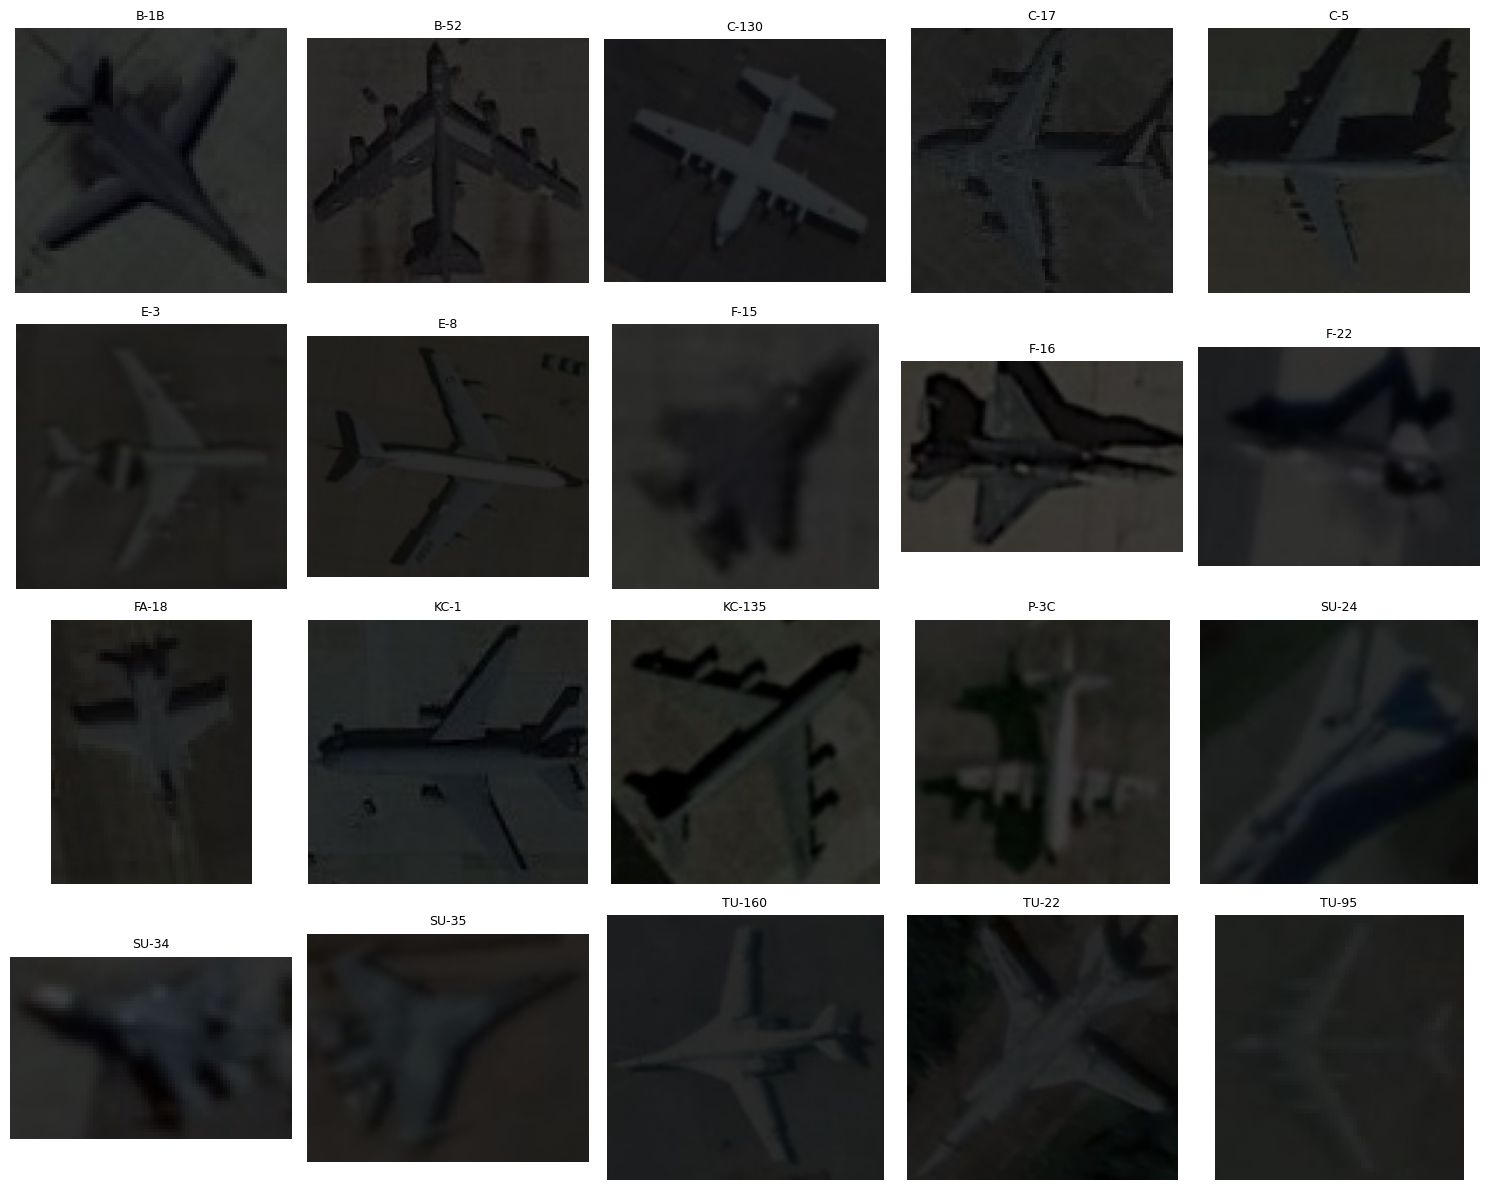

100%|██████████| 20/20 [00:07<00:00,  2.58it/s]


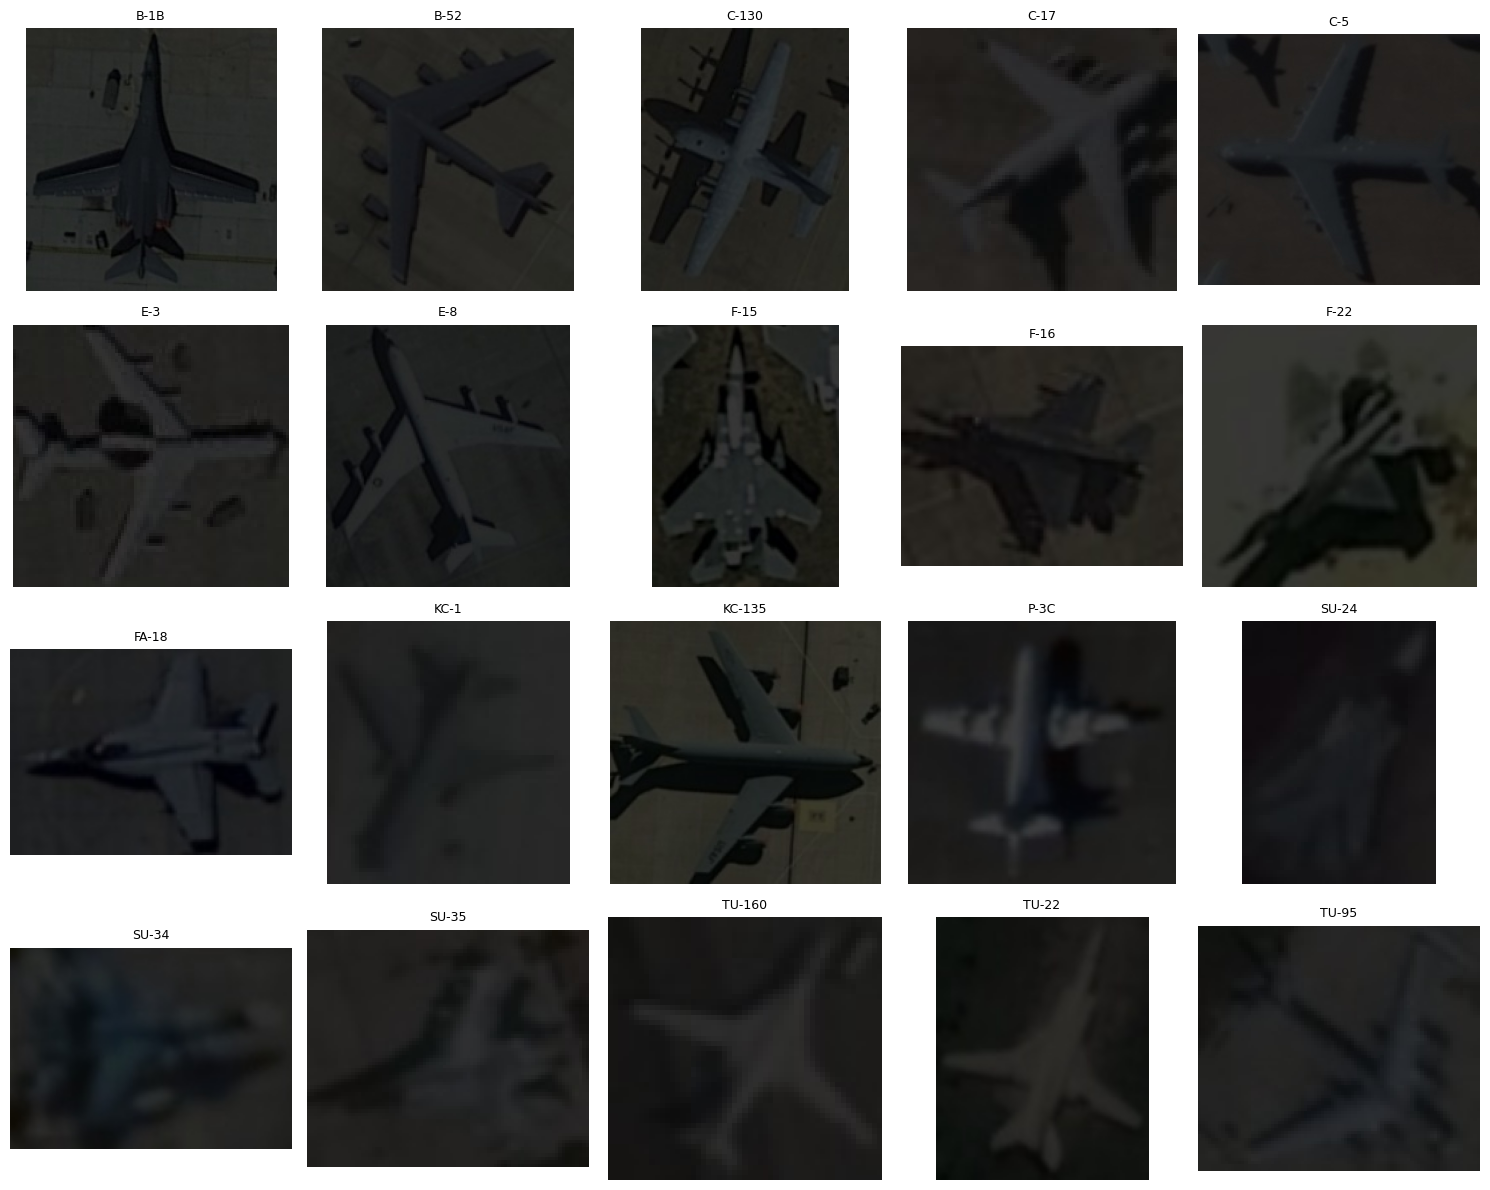

100%|██████████| 20/20 [00:06<00:00,  3.14it/s]


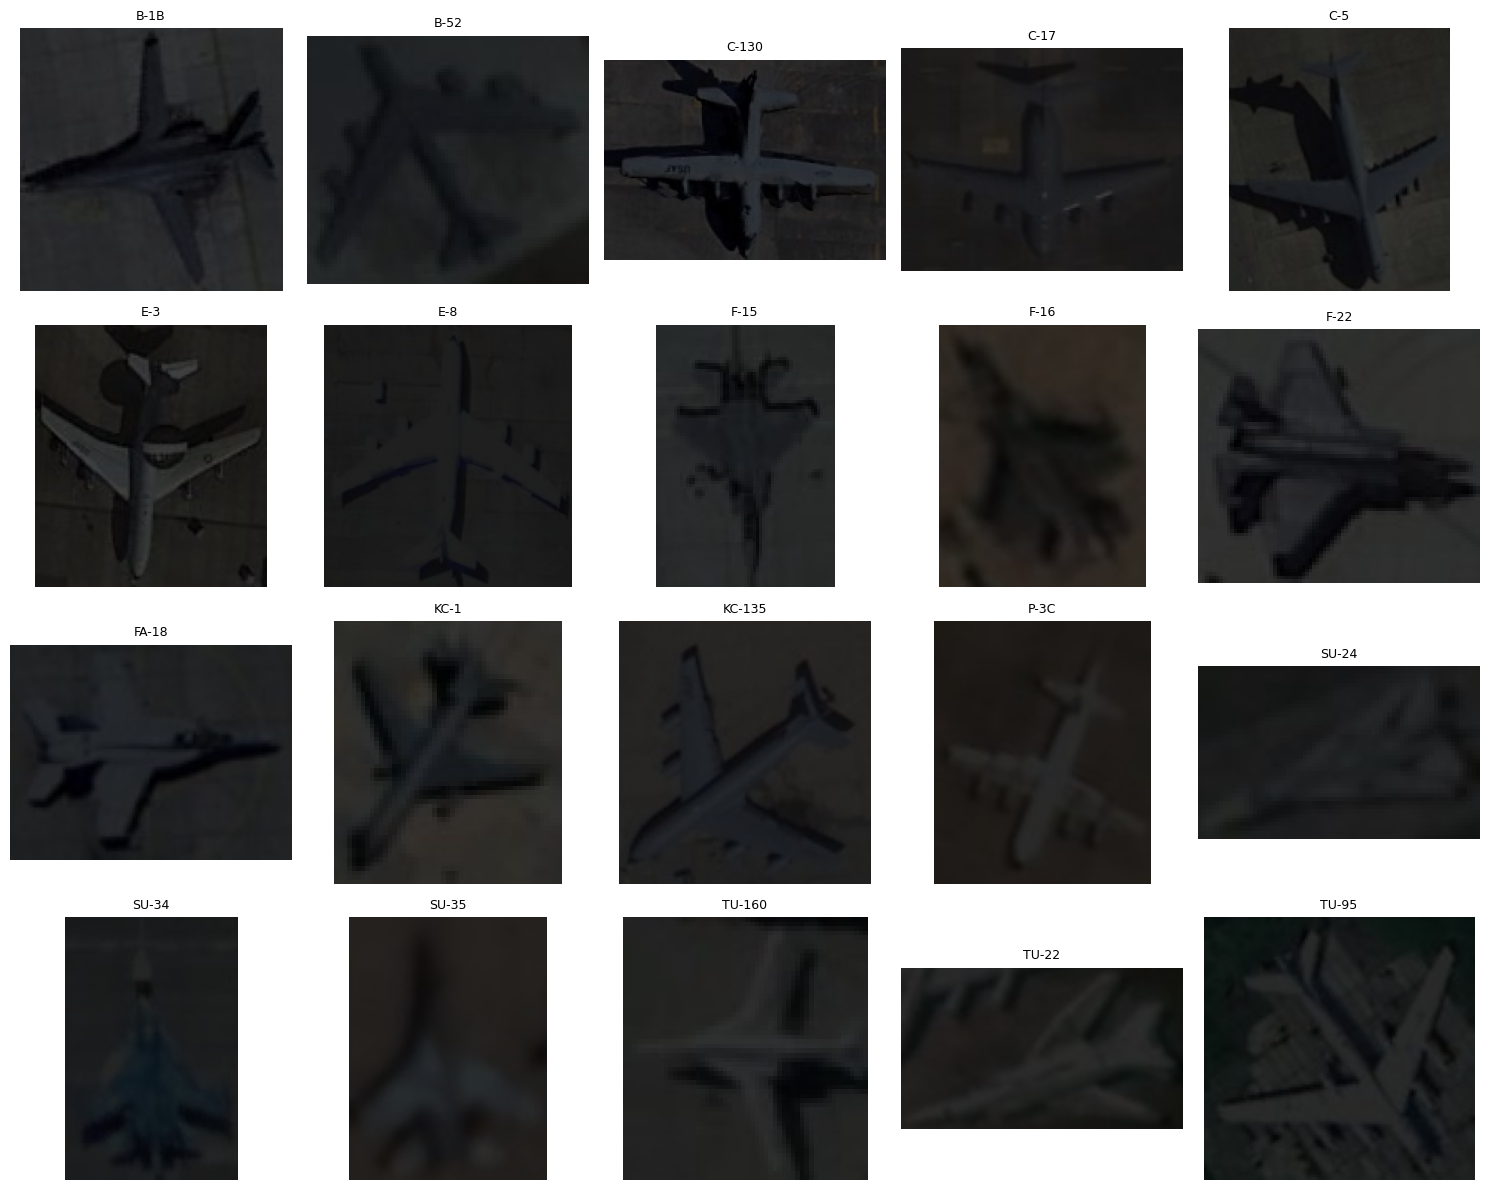

In [6]:
MAX_GAIN = 0.4
MIN_GAIN = 0.1

CENTER_FRAC = 0.5  # fraction of image size used for center crop

N = 10

for M in [1, 2, 3]:
    IN_DIR = f"/home/gridsan/manderson/ovdsat/data/cropped_data/mar/train/mar_N{N}-{M}"
    OUT_DIR = f"/home/gridsan/manderson/ovdsat/data/cropped_data/mar/train/mar_N{N}-{M}-dark"

    os.makedirs(OUT_DIR, exist_ok=True)

    for cls in tqdm(os.listdir(IN_DIR)):

        in_cls = os.path.join(IN_DIR, cls)
        out_cls = os.path.join(OUT_DIR, cls)

        if not os.path.isdir(in_cls):
            continue

        os.makedirs(out_cls, exist_ok=True)

        for name in os.listdir(in_cls):

            in_path = os.path.join(in_cls, name)
            out_path = os.path.join(out_cls, name)

            img = cv2.imread(in_path)
            if img is None:
                continue

            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.float32)

            h, w = hsv.shape[:2]

            # ---- center crop coordinates ----
            ch = int(h * CENTER_FRAC)
            cw = int(w * CENTER_FRAC)

            y1 = (h - ch) // 2
            y2 = y1 + ch
            x1 = (w - cw) // 2
            x2 = x1 + cw

            center_v = hsv[y1:y2, x1:x2, 2]

            # ---- brightness from center crop only ----
            mean_v = np.mean(center_v) / 255.0

            gain = MAX_GAIN - (MAX_GAIN - MIN_GAIN) * mean_v

            # ---- darkness scaling ----
            hsv[:, :, 2] = np.clip(hsv[:, :, 2] * gain, 0, 255)

            bright = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2BGR)

            cv2.imwrite(out_path, bright)

    check_samples(OUT_DIR)

## Obstructed/covered by opaque structure

100%|██████████| 20/20 [00:18<00:00,  1.10it/s]


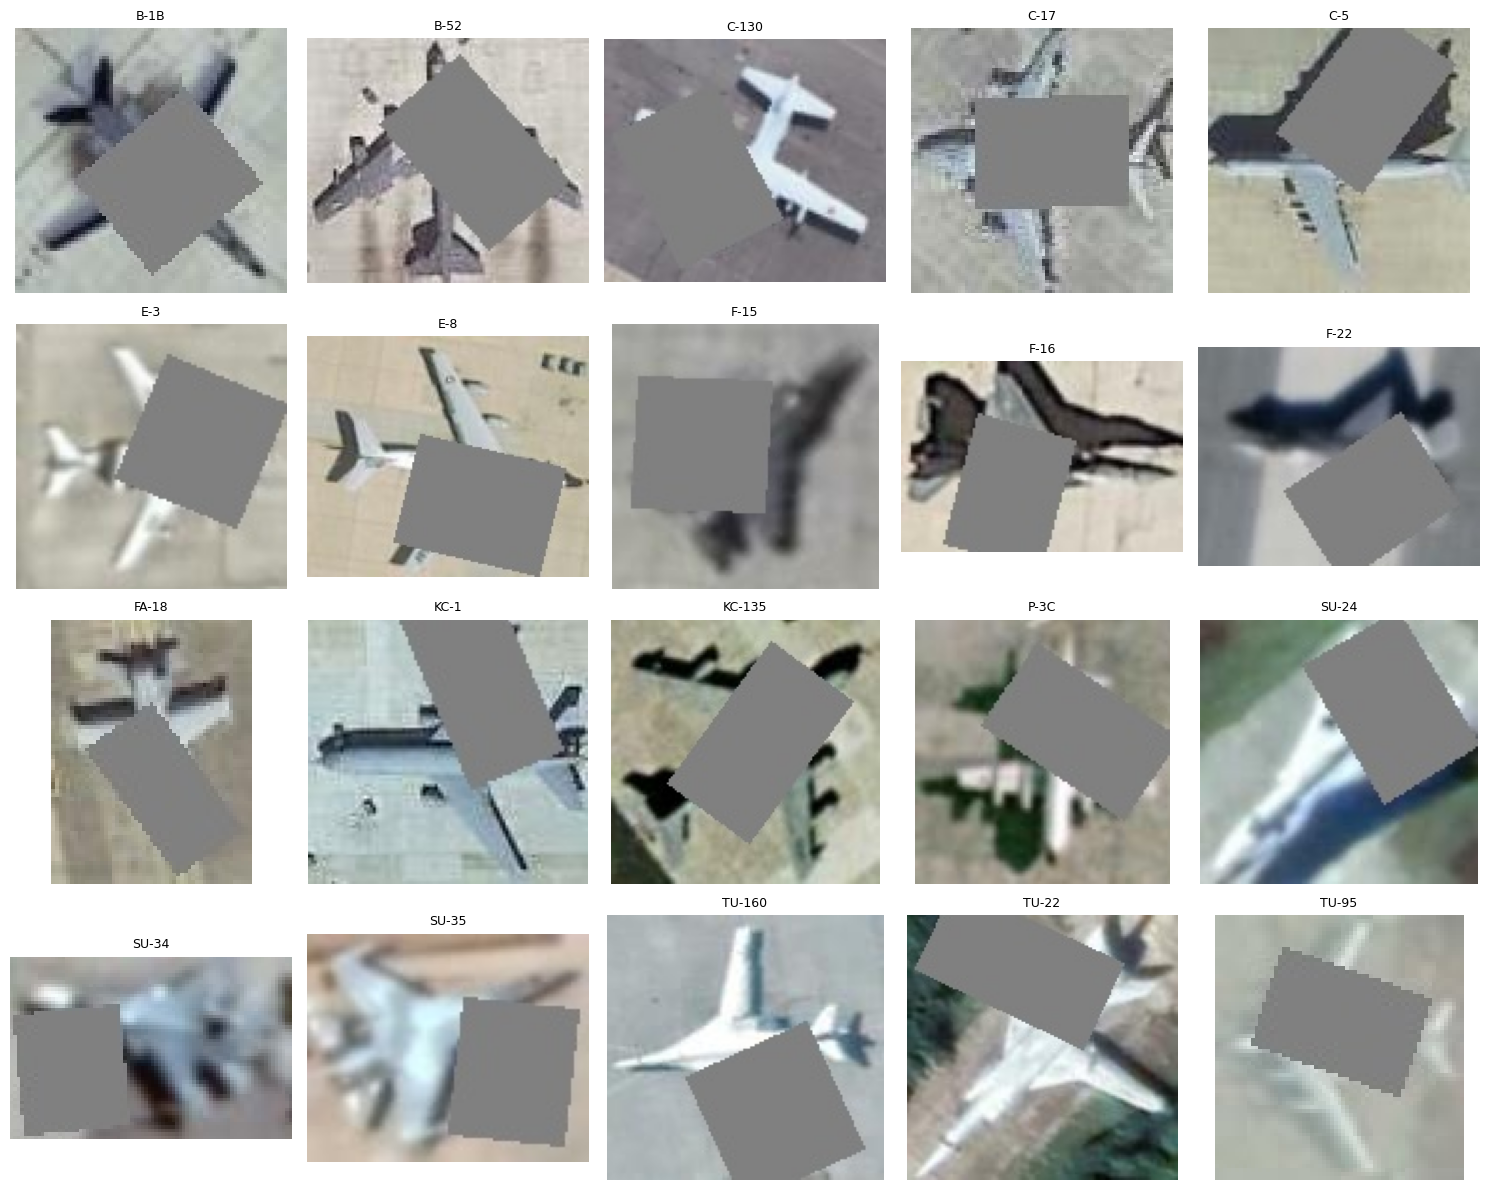

100%|██████████| 20/20 [00:22<00:00,  1.14s/it]


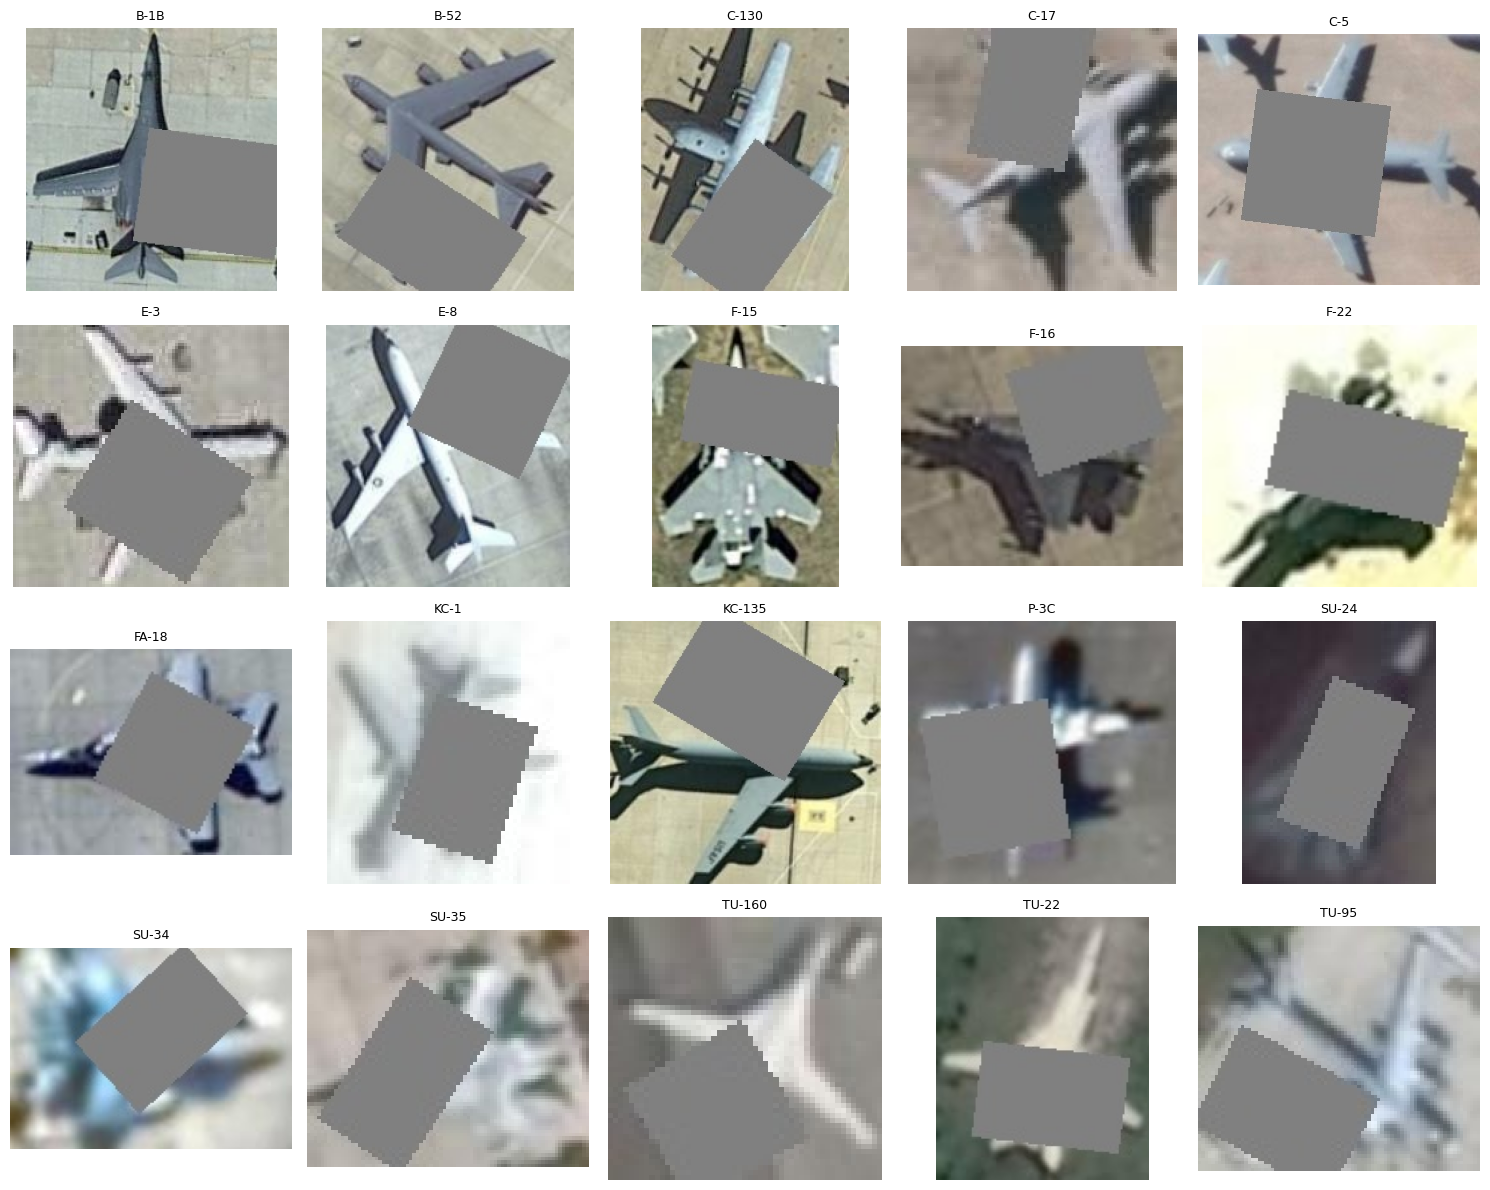

100%|██████████| 20/20 [00:15<00:00,  1.26it/s]


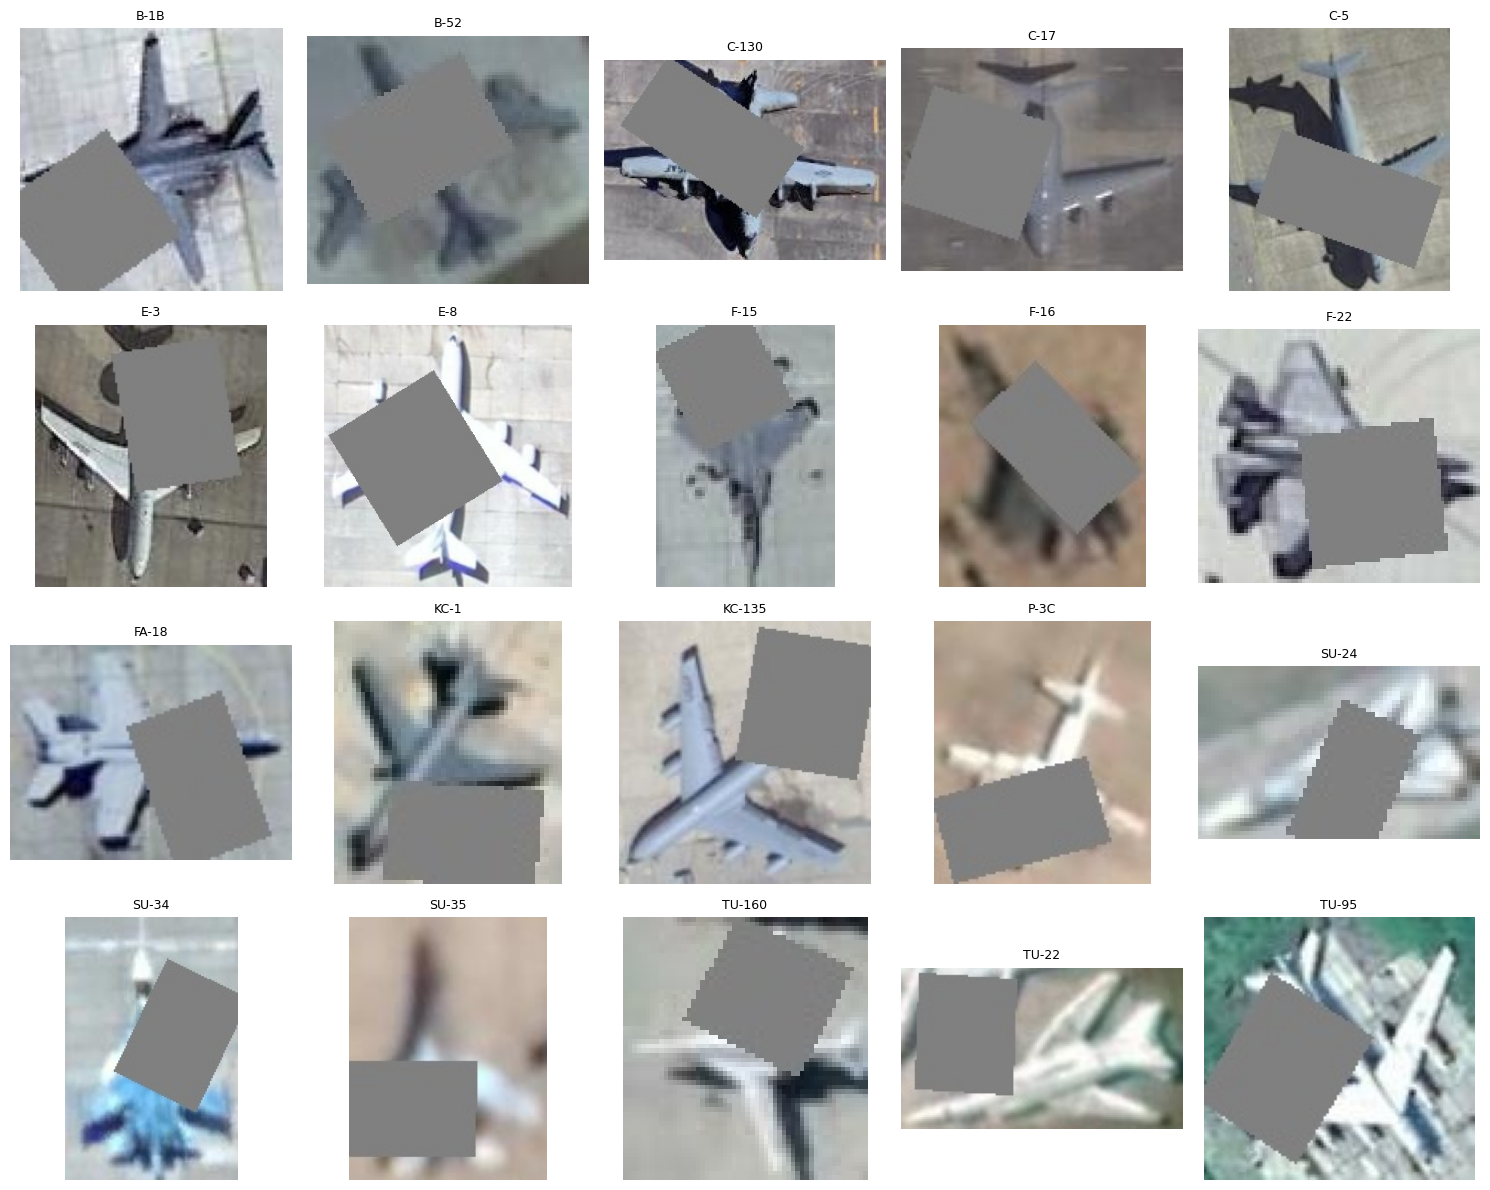

In [5]:
COVER_FRAC = 0.25
GRAY_VAL = 128

N = 10

for M in [1, 2, 3]:
    IN_DIR = f"/home/gridsan/manderson/ovdsat/data/cropped_data/mar/train/mar_N{N}-{M}"
    OUT_DIR = f"/home/gridsan/manderson/ovdsat/data/cropped_data/mar/train/mar_N{N}-{M}-cover"

    os.makedirs(OUT_DIR, exist_ok=True)

    for cls in tqdm(os.listdir(IN_DIR)):

        in_cls = os.path.join(IN_DIR, cls)
        out_cls = os.path.join(OUT_DIR, cls)

        if not os.path.isdir(in_cls):
            continue

        os.makedirs(out_cls, exist_ok=True)

        for name in os.listdir(in_cls):

            in_path = os.path.join(in_cls, name)
            out_path = os.path.join(out_cls, name)

            img = cv2.imread(in_path)
            if img is None:
                continue

            h, w = img.shape[:2]

            # -------- target rotated box area --------
            target_area = COVER_FRAC * h * w

            aspect = np.random.uniform(0.5, 2.0)

            box_h = int(np.sqrt(target_area / aspect))
            box_w = int(box_h * aspect)

            box_h = min(box_h, h - 2)
            box_w = min(box_w, w - 2)

            # -------- random center + rotation --------
            cx = np.random.randint(box_w // 2, w - box_w // 2)
            cy = np.random.randint(box_h // 2, h - box_h // 2)

            angle = np.random.uniform(0, 180)

            rect = ((cx, cy), (box_w, box_h), angle)

            # -------- create rotated mask --------
            mask = np.zeros((h, w), dtype=np.uint8)

            pts = cv2.boxPoints(rect)
            pts = np.int32(pts)

            cv2.fillConvexPoly(mask, pts, 255)

            # -------- apply gray cover using mask --------
            cover = img.copy()
            cover[mask == 255] = GRAY_VAL

            cv2.imwrite(out_path, cover)

    check_samples(OUT_DIR)


### OLD

In [ ]:
# Bright
OUT_DIR = "/home/gridsan/manderson/ovdsat/data/cropped_data/mar/train/mar_N1-1-bright-test"

START_THRESHOLD = 240
MIN_THRESHOLD = 160
THRESH_STEP = 10

MAX_TRIES = 5000

os.makedirs(OUT_DIR, exist_ok=True)

with open(COCO_JSON) as f:
    coco = json.load(f)

images = {i["id"]: i["file_name"] for i in coco["images"]}
cats = {c["id"]: c["name"] for c in coco["categories"]}

by_class = defaultdict(list)
for a in coco["annotations"]:
    by_class[a["category_id"]].append(a)


def brightness(img):
    h, w = img.shape[:2]

    y1, y2 = h // 4, 3 * h // 4
    x1, x2 = w // 4, 3 * w // 4

    center = img[y1:y2, x1:x2]

    return np.mean(cv2.cvtColor(center, cv2.COLOR_BGR2HSV)[:, :, 2])


for cid, anns in by_class.items():

    cname = cats[cid]
    save_dir = os.path.join(OUT_DIR, cname)
    os.makedirs(save_dir, exist_ok=True)

    threshold = START_THRESHOLD
    found = False

    while threshold >= MIN_THRESHOLD and not found:

        print(f"{cname}: trying threshold {threshold}")

        for _ in tqdm(range(MAX_TRIES)):

            ann = random.choice(anns)
            img_path = os.path.join(IMAGE_DIR, images[ann["image_id"]])

            img = cv2.imread(img_path)
            if img is None:
                continue

            x, y, w, h = map(int, ann["bbox"])
            crop = img[y:y+h, x:x+w]

            if crop.size == 0:
                continue

            if brightness(crop) >= threshold:

                out_name = f"{ann['image_id']}_{ann['id']}.jpg"
                out_path = os.path.join(save_dir, out_name)

                cv2.imwrite(out_path, crop)

                print(f"{cname}: saved {out_name} @ {threshold}")
                found = True
                break

        threshold -= THRESH_STEP

    if not found:
        print(f"{cname}: no bright sample found!")

C-17: trying threshold 240


  1%|          | 53/5000 [00:03<04:58, 16.56it/s]


KeyboardInterrupt: 

In [ ]:
# Dark
OUT_DIR = "/home/gridsan/manderson/ovdsat/data/cropped_data/mar/train/mar_N1-dark"

START_THRESHOLD = 50
MAX_THRESHOLD = 100
THRESH_STEP = 10

MAX_TRIES = 2000

os.makedirs(OUT_DIR, exist_ok=True)

with open(COCO_JSON) as f:
    coco = json.load(f)

images = {i["id"]: i["file_name"] for i in coco["images"]}
cats = {c["id"]: c["name"] for c in coco["categories"]}

by_class = defaultdict(list)
for a in coco["annotations"]:
    by_class[a["category_id"]].append(a)


def brightness(img):
    return np.mean(cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, 2])
#     h, w = img.shape[:2]

#     y1, y2 = h // 4, 3 * h // 4
#     x1, x2 = w // 4, 3 * w // 4

#     center = img[y1:y2, x1:x2]

#     return np.mean(cv2.cvtColor(center, cv2.COLOR_BGR2HSV)[:, :, 2])


for cid, anns in by_class.items():

    cname = cats[cid]
    save_dir = os.path.join(OUT_DIR, cname)
    os.makedirs(save_dir, exist_ok=True)

    threshold = START_THRESHOLD
    found = False

    while threshold <= MAX_THRESHOLD and not found:

        print(f"{cname}: trying threshold {threshold}")

        for _ in tqdm(range(MAX_TRIES)):

            ann = random.choice(anns)
            img_path = os.path.join(IMAGE_DIR, images[ann["image_id"]])

            img = cv2.imread(img_path)
            if img is None:
                continue

            x, y, w, h = map(int, ann["bbox"])
            crop = img[y:y+h, x:x+w]

            if crop.size == 0:
                continue

            if brightness(crop) <= threshold:

                out_name = f"{ann['image_id']}_{ann['id']}.jpg"
                out_path = os.path.join(save_dir, out_name)

                cv2.imwrite(out_path, crop)

                print(f"{cname}: saved {out_name} @ {threshold}")
                found = True
                break

        threshold += THRESH_STEP

    if not found:
        print(f"{cname}: no dark sample found")
